<a href="https://colab.research.google.com/github/CamillaCavallo/Clases/blob/main/metricas_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


In [48]:
df = pd.read_csv('/content/drive/MyDrive/clase data science/modifiedBostonHousing.csv')

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


análisis exploratorio

In [50]:
df.shape

(506, 14)

In [51]:
#modelo de regresión que tenga la capacidad de predecir el valor de domicilios (col de precios) utilizando las col RM, LSTRAT PTRATIO.

In [52]:
#col para la regresion
df = df.loc[:,['RM','LSTAT','PTRATIO','price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [53]:
df.shape

(506, 4)

In [54]:
#ver nulos
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

Puedes optar por quitar columnas donde hay un valor perdido, o puedes llenar los datos perdidos. La opción que se utilizó aquí es para quitar las filas con valores perdidos.

In [55]:
df = df.dropna(how = 'any')

In [56]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [57]:
df.shape

(505, 4)

In [58]:
#correlacion
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [59]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


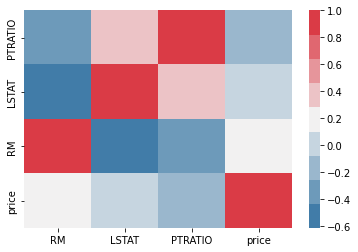

In [60]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

 Histogramas

 Los histogramas se utilizan a menudo para ver si hay algo interesante en los datos. En este caso, se usa para ver si hay algo extraño en el histograma de precios.

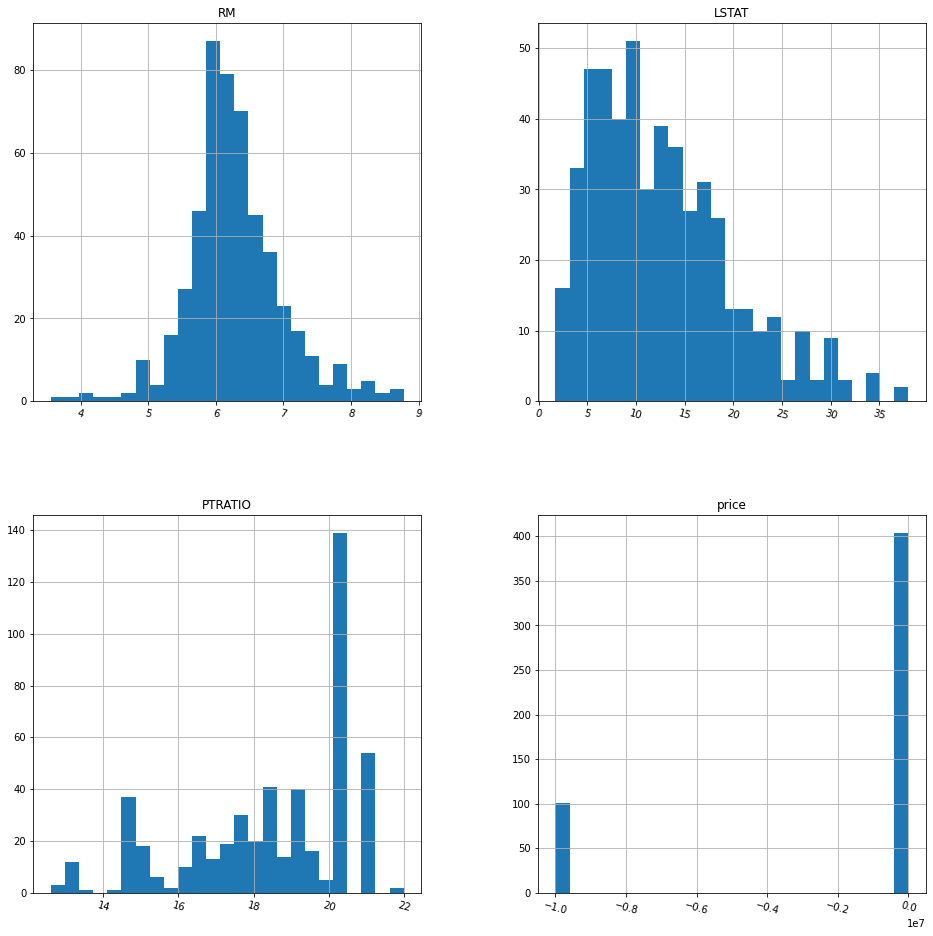

In [61]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

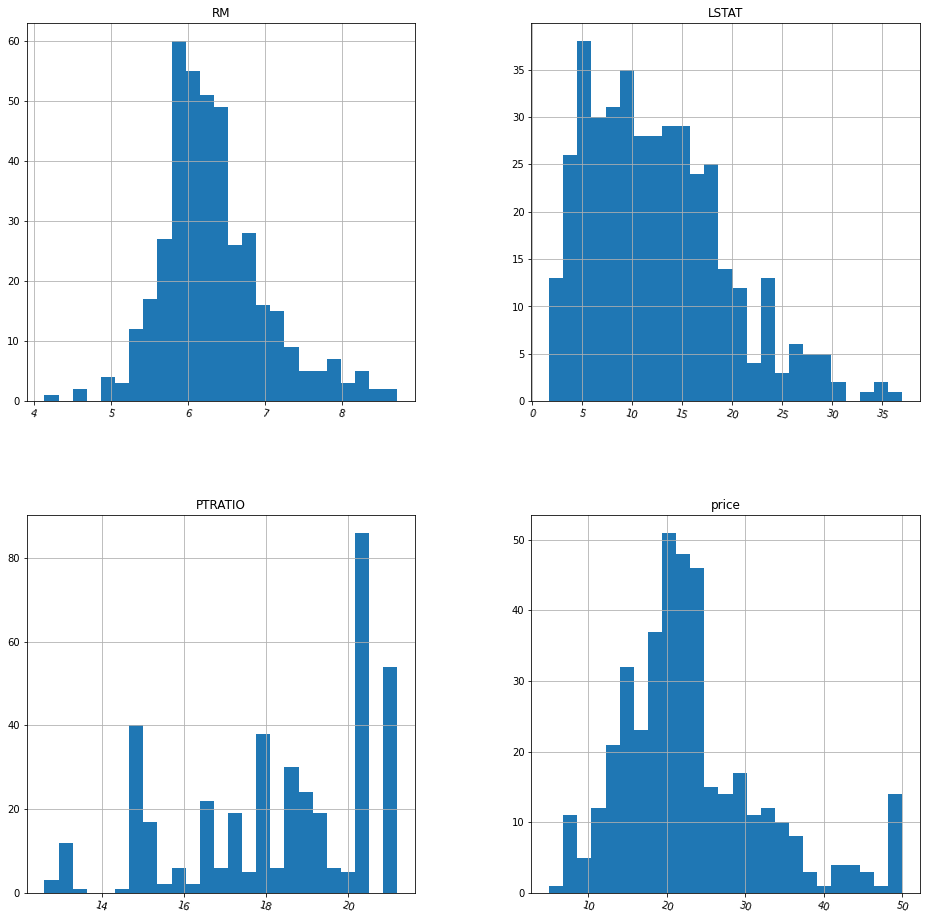

In [62]:
#Eliminar precios negativos

priceFilter = df.loc[:, 'price'] < 0 
df = df.loc[~priceFilter, :]

df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [63]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
LSTAT,-0.650967,1.000000,0.384370,-0.752900
PTRATIO,-0.349077,0.384370,1.000000,-0.551638
RM,1.000000,-0.650967,-0.349077,0.798988
price,0.798988,-0.752900,-0.551638,1.000000


Examinaremos las características, “RM”, “LSTAT” y “PTRATIO”, que nos brindan información cuantitativa sobre cada punto de datos. La variable objetivo, “precio”, será la variable que buscamos predecir.

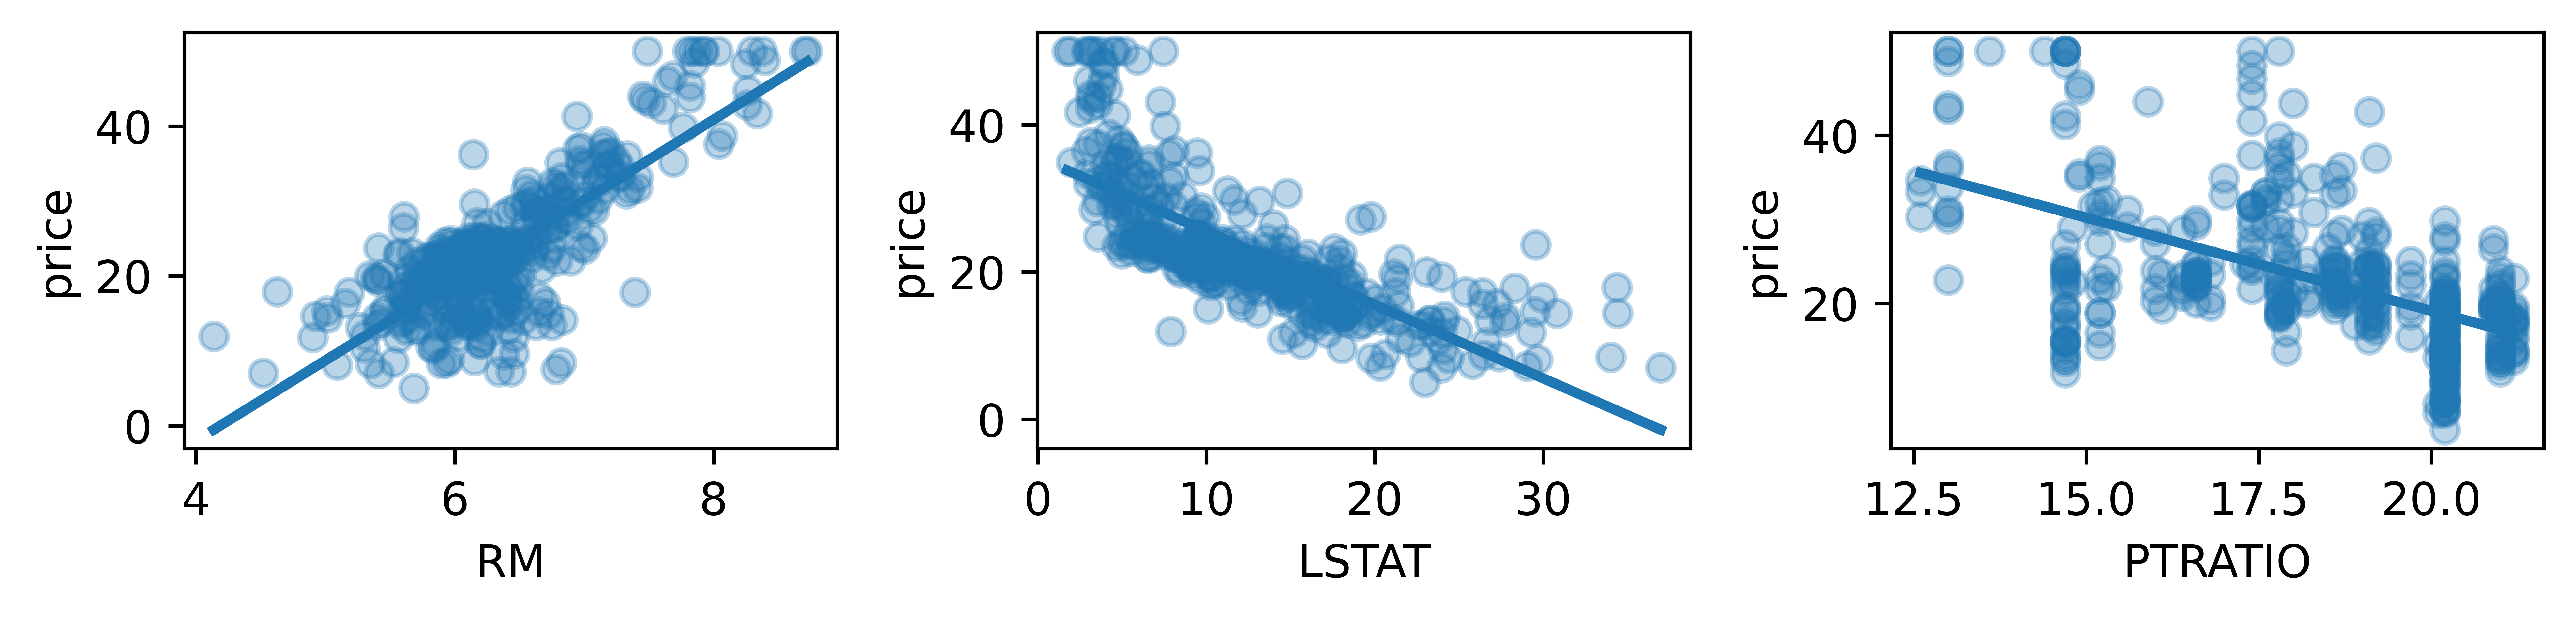

In [64]:
#You can use seaborn to see if you have linear relationships between each feature variable and the target
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (8,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

Organización de datos en la matriz de características y el vector de destino

In [65]:
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values



In [66]:
# Features Matrix needs to be at 2 dimensional
X.shape



(404, 3)

In [67]:
# vector de destino
y = df.loc[:, 'price'].values



In [68]:
y.shape



(404,)

creación del modelo

In [69]:
# Esto ya se importó antes, así que coméntalo -> Paso 1
# pero debes saber que necesitas importar un módulo 
# de sklearn.linear_model importa LinearRegression



In [70]:
#paso 2: crear una instancia del modelo

In [71]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)



In [72]:
# Si quieres ver lo que puedes ajustar para un modelo, puedes utilizar la función de ayuda
# Muy recomendable mirar los modelos futuros antes de usarlos
# aqyuda(LinearRegression)



In [73]:
#Paso 3: Entrenar el modelo en los datos, almacenando la información aprendida.
#El modelo está aprendiendo sobre la relación entre x e y.



In [74]:
reg.fit(X,y)



LinearRegression()

In [75]:
#Paso 4: Predecir los valores de nuevos datos. Usa la información que el modelo aprendió durante el proceso de entrenamiento.

#Predecir por una observación (no te preocupes si la parte de reformación es muy difícil de entender).

In [76]:
# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
reg.predict(X[0].reshape(-1,3))



array([30.93692265])

In [77]:
#Predecir para observaciones múltiples a la vez

reg.predict(X[0:10])

array([30.93692265, 25.54732909, 32.87840913, 31.22126902, 31.14158522,
       26.45245446, 23.99307176, 22.0562208 , 13.67300117, 21.85868698])

Midiendo el desempeño del modelo
A diferencia de la clasificación de modelos, donde una métrica común significa precisión, los modelos de regresión utilizan otras métricas, tales como R^2, el coeficiente de determinación para cuantificar el desempeño de tu modelo. El mejor puntaje posible es 1.0. Un modelo constante que siempre predice el valor esperado de y, ignorando las funciones de input, haría que R^2 obtenga un puntaje de 0.0.

In [78]:
score = reg.score(X, y)
print(score)



0.7848414273030438


ecuación de la línea para la regresión

In [79]:
reg.coef_



array([ 6.61452725, -0.44571061, -1.00672009])

In [80]:
reg.intercept_



5.0688621830514755

In [81]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )



formula: y = 6.61*RM + -0.45*LSTAT + -1.01*'PTRATIO + 5.07


In [82]:
from sklearn.metrics import mean_absolute_error

In [86]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [87]:
reg = LinearRegression()
reg.fit(X,y)


LinearRegression()
y_pred=reg.predict(X)
r2_score(y, y_pred)




0.7848414273030438

In [89]:
mean_absolute_error(y,y_pred)



3.2313558816689714

In [90]:
mean_squared_error(y,y_pred)



17.915487275260496

In [91]:
from numpy import sqrt
sqrt(mean_squared_error(y,y_pred))

4.232669048633556